In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Initializing datasets

Data from http://www.electproject.org/national-1789-present

In [85]:
data = pd.read_csv(r'../data/VoterTurnout.csv')

In [86]:
data.head()

,Year,Presidential,Midterm,Previous Presidential,Previous Midterm
0,1792,6.3,25.0,11.6,21.6
1,1796,20.1,36.0,6.3,25.0
2,1800,32.3,42.0,20.1,36.0
3,1804,23.8,45.8,32.3,42.0
4,1808,36.8,49.8,23.8,45.8


In [87]:
data.tail()

,Year,Presidential,Midterm,Previous Presidential,Previous Midterm
52,2000,54.2,39.5,51.7,38.1
53,2004,60.1,40.4,54.2,39.5
54,2008,61.6,41.0,60.1,40.4
55,2012,58.6,36.7,61.6,41.0
56,2016,60.1,50.0,58.6,36.7


In [253]:
x = data[['Previous Presidential', 'Previous Midterm']]
y = data['Presidential']

In [254]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.65, random_state=0)

# Fit regression using decision tree

In [255]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0)
model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [256]:
model.score(x_train, y_train)

1.0

#### Score of 0.74 on test data

In [257]:
model.score(x_test, y_test)

0.741497677923906

# Visualization

[Text(136.8173076923077, 201.90857142857143, 'Previous Presidential <= 46.05\nmse = 498.506\nsamples = 19\nvalue = 55.053'),
 Text(51.50769230769231, 170.84571428571428, 'Previous Midterm <= 46.05\nmse = 296.794\nsamples = 5\nvalue = 24.88'),
 Text(25.753846153846155, 139.78285714285715, 'Previous Midterm <= 23.3\nmse = 56.709\nsamples = 3\nvalue = 16.733'),
 Text(12.876923076923077, 108.72, 'mse = 0.0\nsamples = 1\nvalue = 6.3'),
 Text(38.63076923076923, 108.72, 'Previous Presidential <= 19.3\nmse = 3.422\nsamples = 2\nvalue = 21.95'),
 Text(25.753846153846155, 77.65714285714284, 'mse = 0.0\nsamples = 1\nvalue = 20.1'),
 Text(51.50769230769231, 77.65714285714284, 'mse = -0.0\nsamples = 1\nvalue = 23.8'),
 Text(77.26153846153846, 139.78285714285715, 'Previous Presidential <= 33.65\nmse = 408.04\nsamples = 2\nvalue = 37.1'),
 Text(64.38461538461539, 108.72, 'mse = 0.0\nsamples = 1\nvalue = 57.3'),
 Text(90.13846153846154, 108.72, 'mse = 0.0\nsamples = 1\nvalue = 16.9'),
 Text(222.126923

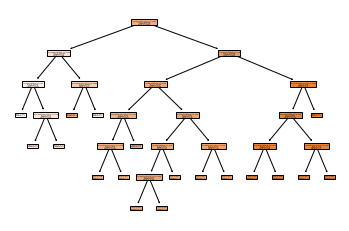

In [258]:
from sklearn import tree
tree.plot_tree(model, filled=True, feature_names=x.columns)

In [247]:
def predict(previous_presidential, previous_midterm):
    array = np.array([[previous_presidential, previous_midterm]])
    array.reshape(-1, 1)
    return model.predict(array)[0]

Prediction of 2020 presidential election voter turnout is 62.5% given the turnout of 2016 (60.1%) and 2018 (50%)

In [248]:
predict(60.1, 50)

62.5

In [249]:
prev_pres = data['Previous Presidential']
prev_mid = data['Previous Midterm']

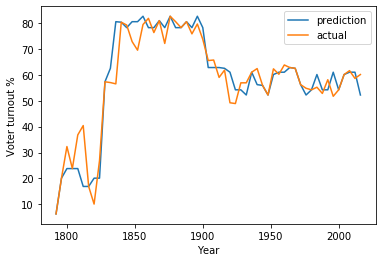

In [251]:
# Prepping to initialize axes
start = data['Year'][0]
num = len(x)
step = 4

# Initialize axes
x_axis = np.arange(0, num) * step + start
prediction = [predict(prev_pres[i], prev_mid[i]) for i in range(len(x_axis))]
actual = [data['Presidential'][i] for i in range(len(x_axis))]

# Plot lines
plt.plot(x_axis, prediction, label='prediction')
plt.plot(x_axis, actual, label='actual')

# Label axes and show line labels as well
plt.xlabel('Year')
plt.ylabel('Voter turnout %')
plt.legend()

# Show graph
plt.show()